In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime, timedelta
from dateutil import parser
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,4

In [77]:
df = pd.read_csv('HR.csv')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
age = []
employed_time = []
for x in range(len(df)):
    b_date = parser.parse(df['date_of_birth'][x])
    e_date = parser.parse(df['start_date'][x])
    c_date = datetime.now()
    if (b_date > datetime.now()) is True:
        b_date -= timedelta(days=365*100)
    if (e_date > datetime.now()) is True:
        e_date -= timedelta(days=365*100)
    delta_age = c_date.year - b_date.year
    delta_work = (c_date.year - e_date.year) * 12 + c_date.month - e_date.month
    age.append(delta_age)
    employed_time.append(delta_work)
    
df['age'] = age
df['employed_months'] = employed_time
df.rename(columns={'are_you_a_caregiver_for_children_in_your_home?':'caregiver',
                          'race/ethnicity_(please_select_all_that_apply)':'ethnicity'}, 
                 inplace=True)
white = []
hispanic = []
east_asian = []
black = []
south_asian = []
for x in range(len(df)):
    if 'White' in df['ethnicity'][x]:
        white.append(1)
    else: white.append(0)
    if 'Hispanic' in df['ethnicity'][x]:
        hispanic.append(1)
    else: hispanic.append(0)
    if 'East Asian' in df['ethnicity'][x]:
        east_asian.append(1)
    else: east_asian.append(0)
    if 'Black' in df['ethnicity'][x]:
        black.append(1)
    else: black.append(0)
    if 'South Asian' in df['ethnicity'][x]:
        south_asian.append(1)
    else: south_asian.append(0)
df['white'] = white
df['hispanic'] = hispanic
df['east_asian'] = east_asian
df['black'] = black
df['south_asian'] = south_asian
    

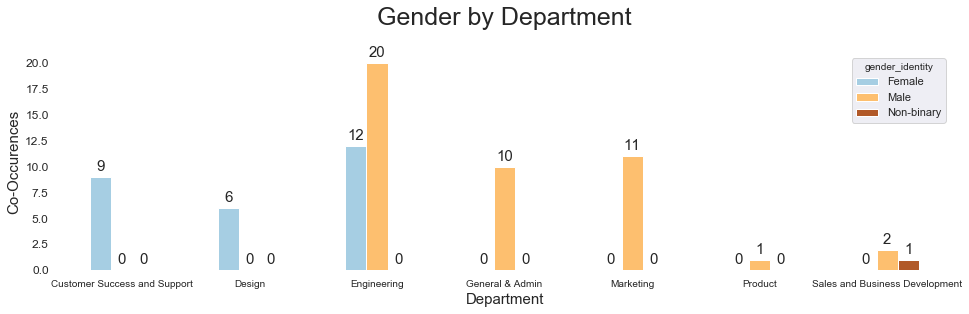

In [81]:
counts = df.groupby(['department','gender_identity']).department.count().unstack()

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), 
                    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points',fontsize=15)
plt.box(on=None)
plt.xlabel ('Department',fontsize=15)
plt.ylabel ('Co-Occurences', fontsize=15)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Gender by Department',fontsize=25, y=1.1)
plt.show()

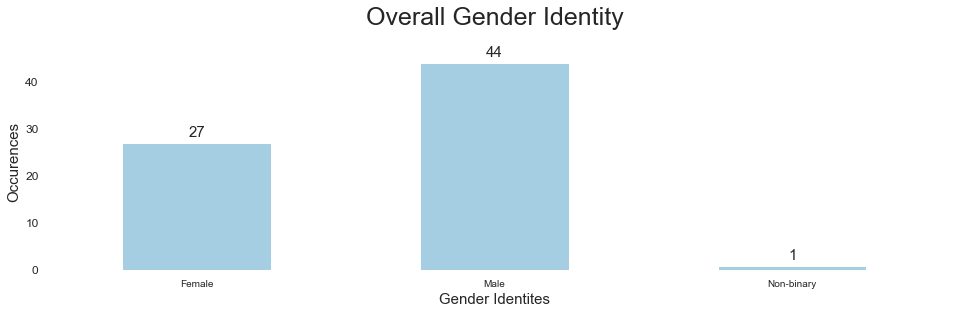

In [82]:
ax = df.groupby('gender_identity').gender_identity.count().plot(kind='bar',colormap = 'Paired')



for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), 
                    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points',fontsize=15)
plt.box(on=None)
plt.xlabel ('Gender Identites',fontsize=15)
plt.ylabel ('Occurences', fontsize=15)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Overall Gender Identity',fontsize=25, y=1.1)
plt.show()

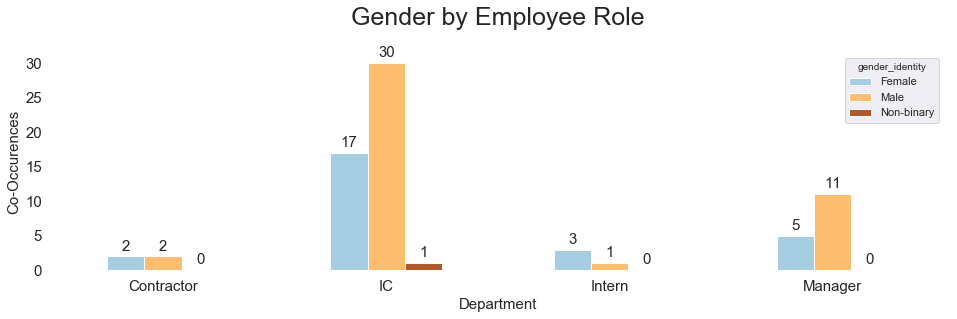

In [83]:
counts = df.groupby(['employee_role','gender_identity']).employee_role.count().unstack()

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), 
                    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points',fontsize=15)
plt.box(on=None)
plt.xlabel ('Department',fontsize=15)
plt.ylabel ('Co-Occurences', fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Gender by Employee Role',fontsize=25, y=1.1)
plt.show()

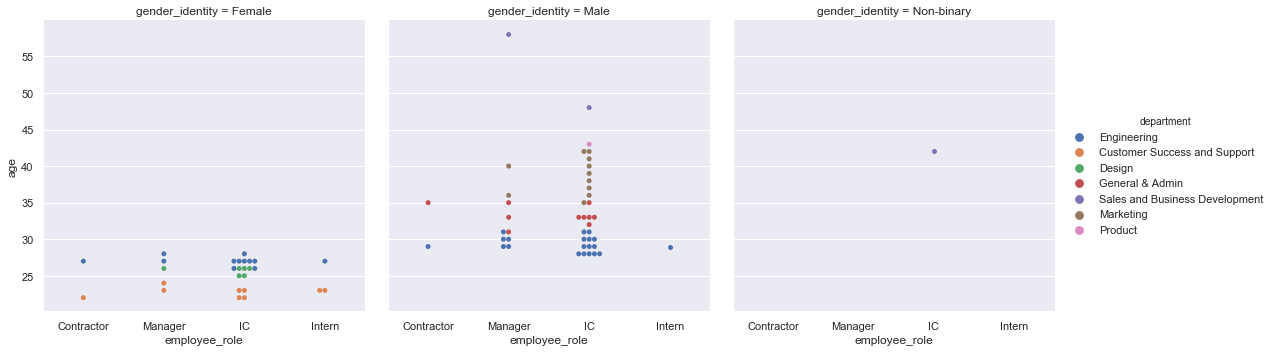

In [84]:
g = sns.catplot("employee_role", "age", "department", col="gender_identity", data=df, kind="swarm")

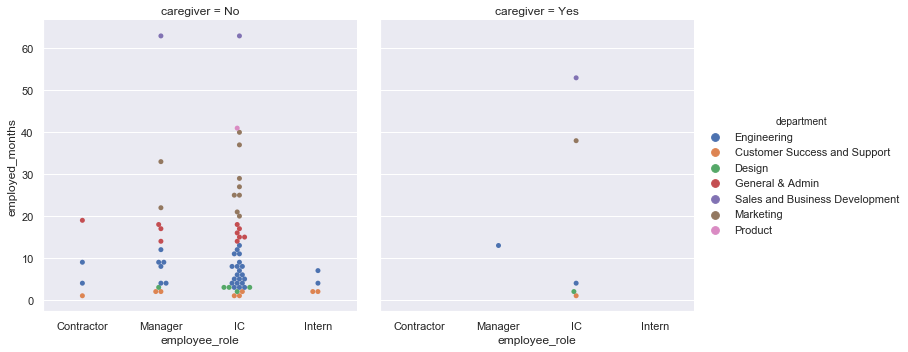

In [85]:
g = sns.catplot("employee_role", "employed_months", "department", col="caregiver", data=df, kind="swarm")

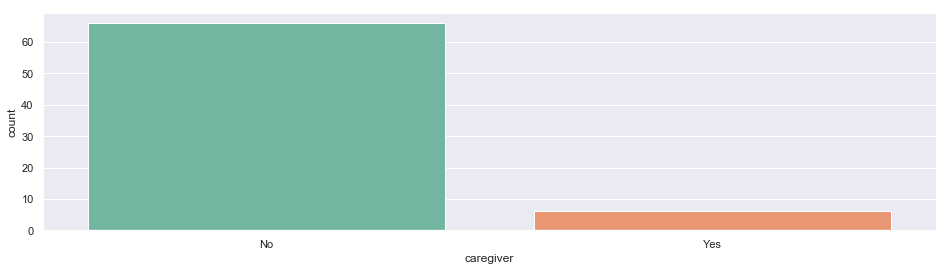

In [86]:
g = sns.countplot(data = df, x='caregiver', palette = 'Set2')

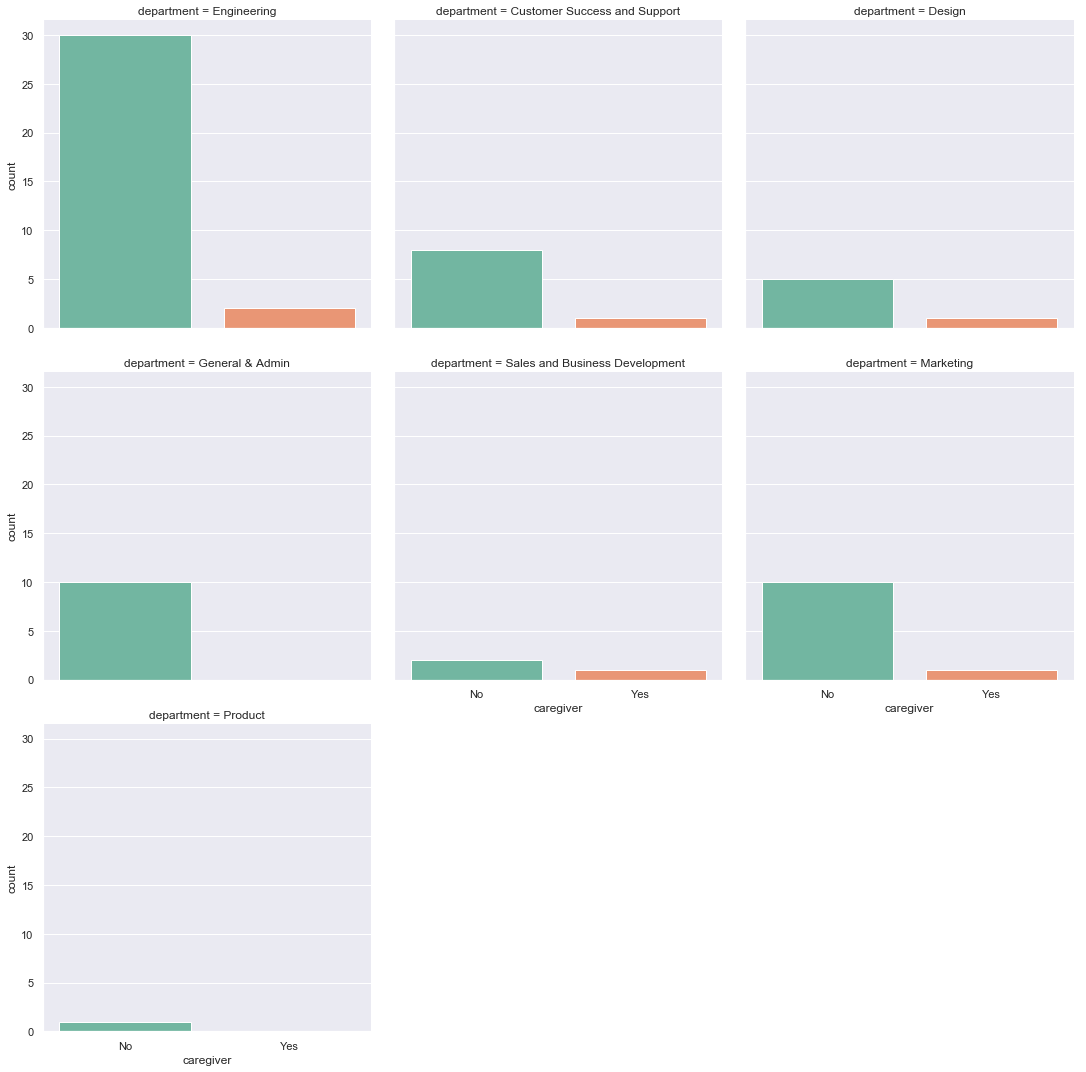

In [87]:
g = sns.catplot(data = df, x='caregiver', col='department', palette = 'Set2', kind='count', col_wrap = 3)

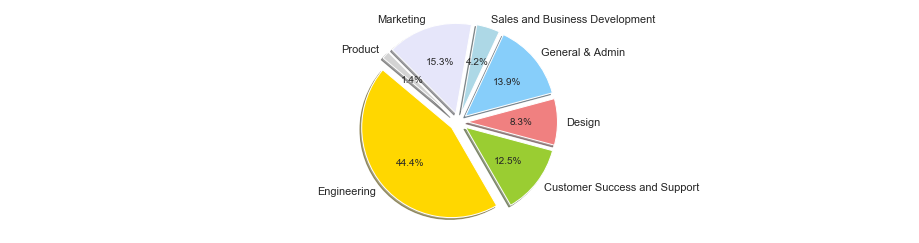

In [95]:
# Data to plot
pie_df = df.groupby('department').start_date.count().copy()
labels = df.department.unique()
sizes = []
for x in labels:
    sizes.append(pie_df[x])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightblue', 'lavender', 'lightgrey']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Text(0.5,0,'Months at Figma')

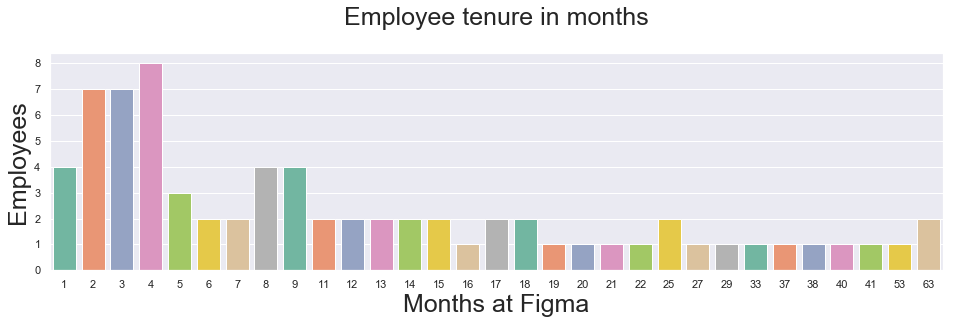

In [98]:
g = sns.countplot(data = df, x='employed_months', palette = 'Set2')
plt.title('Employee tenure in months',fontsize=25, y=1.1)
plt.ylabel('Employees',fontsize=25)
plt.xlabel('Months at Figma',fontsize=25)